In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Load all the csv data in the directory

In [71]:
dir_path = "../../DATA/VEX_MAGNETO/fetched_data2"
file_names = sorted(filter(lambda name: "csv" in name, os.listdir(dir_path)))
file_names = [os.path.join(dir_path, name) for name in file_names]
file_names = file_names[-1:] + file_names[:-1]

In [72]:
date_format = '%Y-%m-%dT%H:%M:%S.%f'
dfs = [pd.read_csv(file_name, index_col=0) for file_name in file_names]
for df in dfs:
    df.index = pd.to_datetime(df.index)

for df in dfs:
    print(df.head())

                            BX        BY        BZ         BT          XSC  \
date                                                                         
2006-04-24 00:00:00  12.357658 -1.304164 -3.332425  12.881274 -4451.055178   
2006-04-24 00:05:00  12.868947 -0.980800 -3.360027  13.340680 -4202.246280   
2006-04-24 00:10:00  12.857438 -0.871986 -3.487877  13.355384 -3954.000329   
2006-04-24 00:15:00  12.898635 -0.684986 -2.885689  13.248405 -3705.057257   
2006-04-24 00:20:00  12.766473 -0.517608 -2.217135  12.972905 -3453.676541   

                             YSC           ZSC           RSC  
date                                                          
2006-04-24 00:00:00 -3196.485753 -65466.762260  65695.760575  
2006-04-24 00:05:00 -3138.377907 -65806.350827  66015.078600  
2006-04-24 00:10:00 -3080.233288 -66137.913808  66327.612616  
2006-04-24 00:15:00 -3021.761270 -66463.291041  66635.079608  
2006-04-24 00:20:00 -2962.553108 -66784.717784  66939.596338  
            

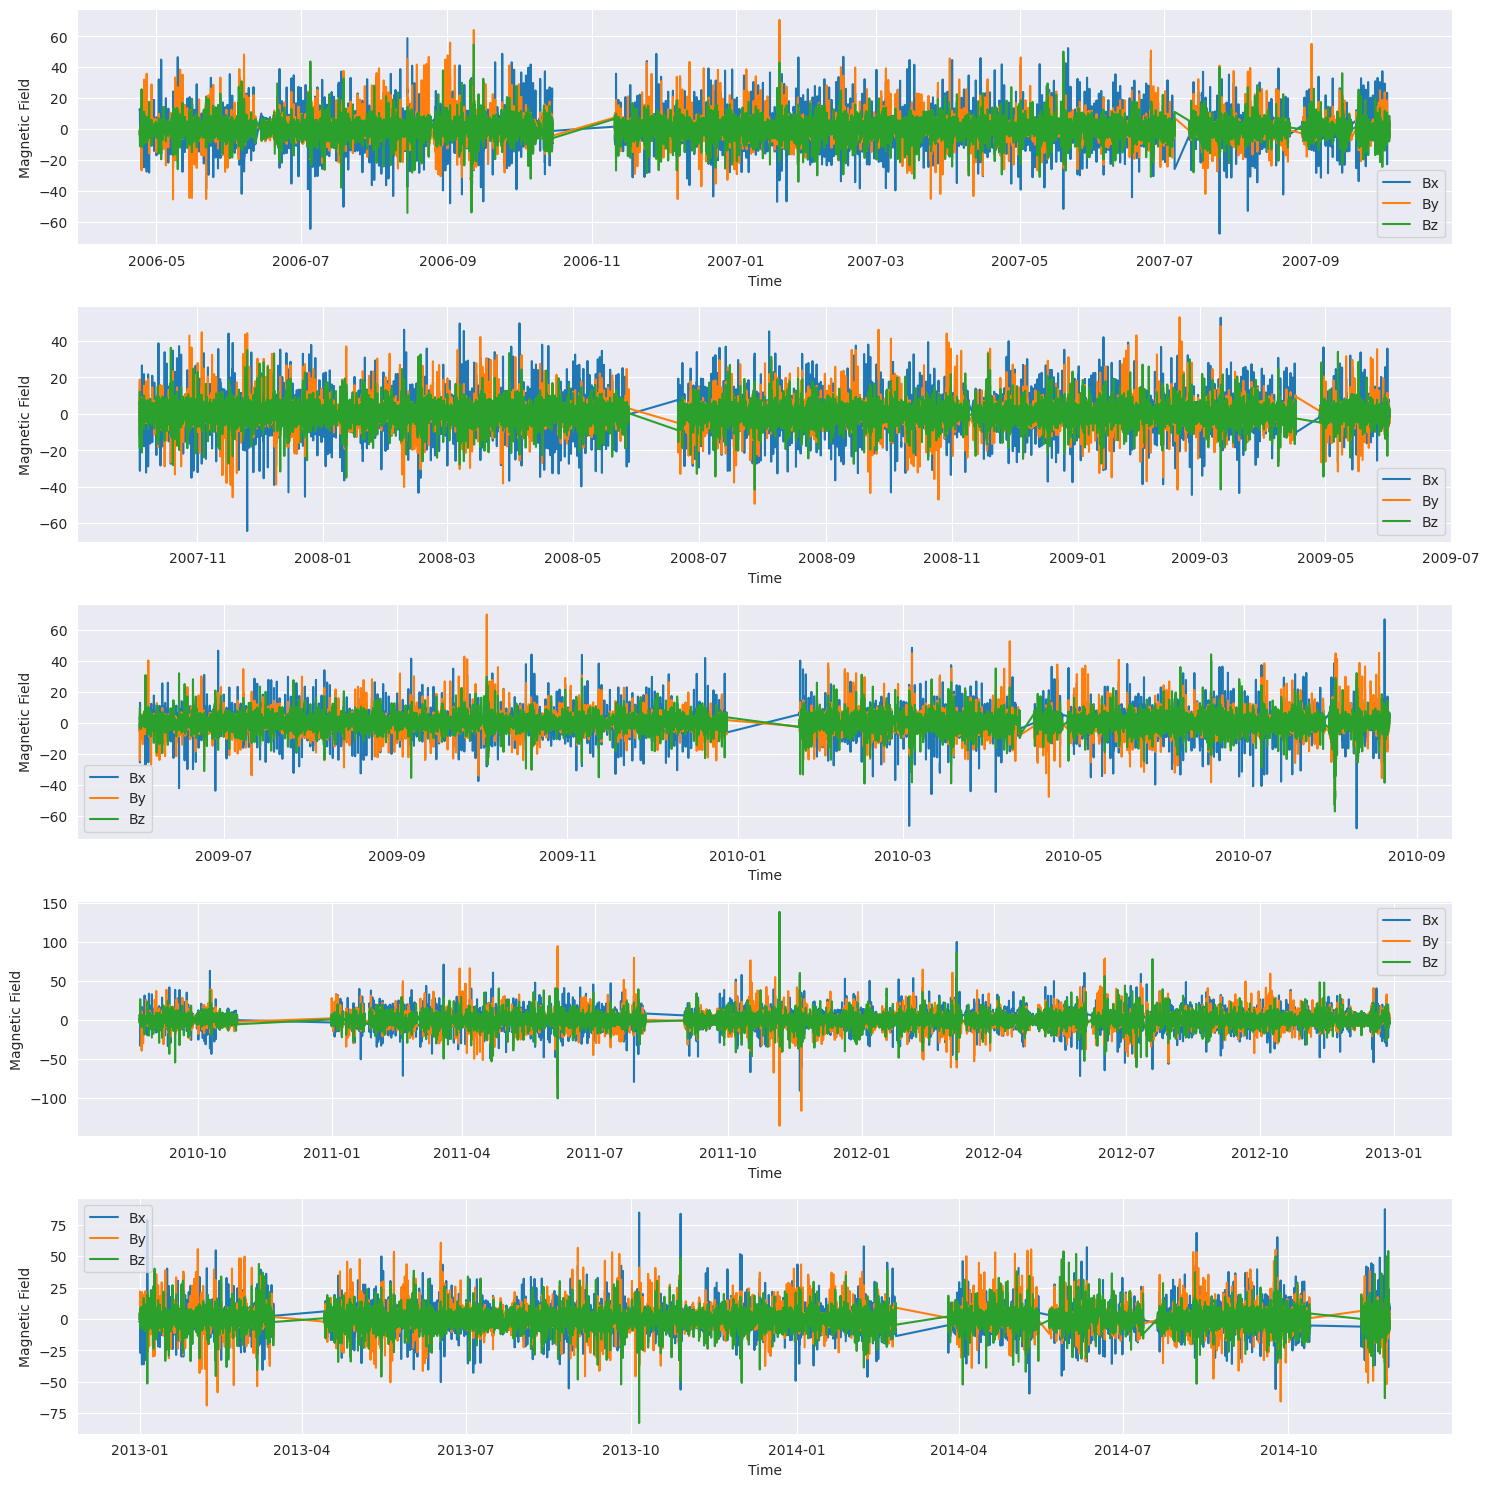

In [73]:
def plot_df(data: pd.DataFrame, ax):
    ax.plot(data.index, data['BX'], label='Bx')
    ax.plot(data.index, data['BY'], label='By')
    ax.plot(data.index, data['BZ'], label='Bz')
    ax.set_xlabel('Time')
    ax.set_ylabel('Magnetic Field')
    ax.legend()

fig, ax = plt.subplots(len(dfs), figsize=(15, 15))
for i, df in enumerate(dfs):
    plot_df(df, ax[i])
plt.tight_layout()
plt.show()

# Combine all the dataframes into one   

<Axes: xlabel='date'>

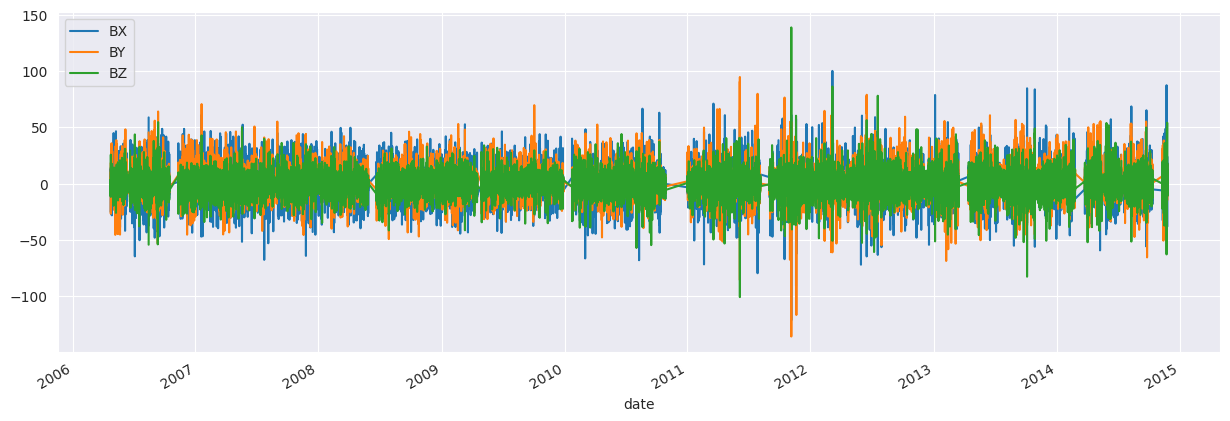

In [74]:
df = pd.concat(dfs)
plot_df = df[df.columns[:3]]
# plot_df = plot_df.loc['2008-01-01': '2008-12-01']
plot_df.plot(figsize=(15, 5))

In [76]:
df.to_csv('VEX-V-Y-MAG-4.csv')